In [155]:
!pip install sklearn datashader plotly folium

In [156]:
import pandas as pd
import sklearn
from tensorflow import feature_column as fc
import folium

# Récupération des données sources sur data.gouv.nc
Il n'y a pas de données avant 2019 pour la Nouvelle Calédonie

In [83]:
%%bash
mkdir data
# caracteristiques-2020.csv
wget https://www.data.gouv.fr/fr/datasets/r/07a88205-83c1-4123-a993-cba5331e8ae0 -O data/caracteristiques-2020.csv
# 2019
wget https://www.data.gouv.fr/fr/datasets/r/e22ba475-45a3-46ac-a0f7-9ca9ed1e283a -O data/caracteristiques-2019.csv
# usagers-2020.csv
wget https://www.data.gouv.fr/fr/datasets/r/78c45763-d170-4d51-a881-e3147802d7ee -O data/usagers-2020.csv
# 2019
wget https://www.data.gouv.fr/fr/datasets/r/36b1b7b3-84b4-4901-9163-59ae8a9e3028 -O data/usagers-2019.csv

mkdir: impossible de créer le répertoire «data»: Le fichier existe
--2022-01-29 18:54:38--  https://www.data.gouv.fr/fr/datasets/r/07a88205-83c1-4123-a993-cba5331e8ae0
Résolution de www.data.gouv.fr (www.data.gouv.fr)... 37.59.183.93
Connexion vers www.data.gouv.fr (www.data.gouv.fr)|37.59.183.93|:443... connecté.
requête HTTP transmise, en attente de la réponse... 302 FOUND
Emplacement: https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/20211110-111202/caracteristiques-2020.csv [suivant]
--2022-01-29 18:54:39--  https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/20211110-111202/caracteristiques-2020.csv
Résolution de static.data.gouv.fr (static.data.gouv.fr)... 37.59.183.93
Connexion vers static.data.gouv.fr (static.data.gouv.fr)|37.59.183.93|:443... connecté.
requête HTTP transmise, en attente de la réponse... 20

In [84]:
caracteristiques = pd.read_csv('data/caracteristiques-2020.csv', delimiter=';')
caracteristiques =  pd.concat([caracteristiques, pd.read_csv('data/caracteristiques-2019.csv', delimiter=';')])
print(caracteristiques.head())
caracteristiques.describe()

        Num_Acc  jour  mois    an   hrmn  lum dep    com  agg  int  atm  col  \
0  202000000001     7     3  2020  16:55    1  91  91657    2    3    1    3   
1  202000000002     7     3  2020  08:35    2  91  91657    2    9    7    6   
2  202000000003     7     3  2020  13:30    1  91  91174    2    2    1    3   
3  202000000004     7     3  2020  18:50    5  91  91215    2    1    1    6   
4  202000000005     7     3  2020  11:00    1  77  77181    1    6    1    2   

                       adr         lat       long  
0  HENRI BARBUSSE (AVENUE)  48,7053500  2,4384100  
1        MOUSSEAUX(CHEMIN)  48,6900000  2,4100000  
2           CARNOT(AVENUE)  48,6106700  2,4758200  
3     VICTOR HUGO (AVENUE)  48,6978200  2,5244600  
4  LAGNY  (RUE DE  ) - D35  48,8286457  2,7059707  


,Num_Acc,jour,mois,an,lum,agg,int,atm,col
count,1.065840e+05,106584.000000,106584.000000,106584.000000,106584.000000,106584.000000,106584.000000,106584.000000,106584.000000
mean,2.019448e+11,15.656778,6.710454,2019.447947,1.945827,1.645397,2.041244,1.619164,4.057982
std,4.972579e+07,8.722528,3.412225,0.497285,1.505150,0.478395,2.004140,1.680102,2.036893
min,2.019000e+11,1.000000,1.000000,2019.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000
25%,2.019000e+11,8.000000,4.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,3.000000
50%,2.019001e+11,16.000000,7.000000,2019.000000,1.000000,2.000000,1.000000,1.000000,3.000000
75%,2.020000e+11,23.000000,10.000000,2020.000000,3.000000,2.000000,2.000000,1.000000,6.000000
max,2.020000e+11,31.000000,12.000000,2020.000000,5.000000,2.000000,9.000000,9.000000,7.000000


In [85]:
usagers = pd.read_csv('data/usagers-2020.csv', delimiter=';')
usagers = pd.concat([usagers, pd.read_csv('data/usagers-2019.csv', delimiter=';')])
usagers.head()

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202000000001,154 742 274,B01,1,1,1,1,1983,5,1,0,-1,-1,-1,-1
1,202000000001,154 742 275,A01,1,1,3,1,1982,5,2,6,-1,-1,-1,-1
2,202000000002,154 742 273,A01,1,1,1,1,1997,1,8,0,-1,-1,-1,-1
3,202000000002,154 742 273,A01,10,3,4,1,1967,5,0,-1,-1,3,3,1
4,202000000003,154 742 271,B01,1,1,1,1,1985,0,1,0,-1,-1,-1,-1


In [86]:
df = pd.merge(caracteristiques, usagers, how='left', left_on=['Num_Acc'], right_on=['Num_Acc'])

# Répartition des accidents en NC par mois

<AxesSubplot:xlabel='mois'>

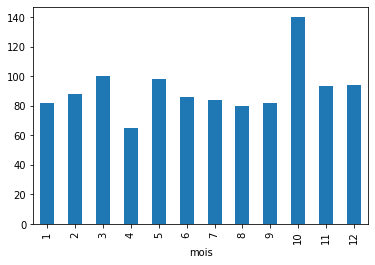

In [153]:
# on ne garde que les accidents de la NC
df1 = df.loc[df.dep.isin(['988']), ['Num_Acc' , 'jour' , 'mois', 'an' , 'grav', 'hrmn', 'lat', 'long']]
# et ceux où il y a des blessés
df1 = df1.loc[df.grav.isin([2,3,4]) ]
df1.groupby(['mois']).size().plot(kind="bar")

# Répartition des accidents en NC par jour

<AxesSubplot:xlabel='jour'>

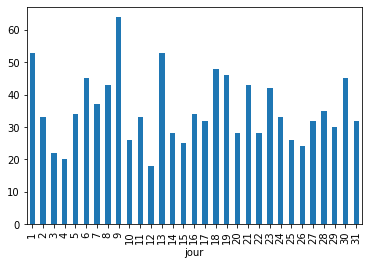

In [144]:
df1.groupby(['jour']).size().plot(kind="bar")

# Répartition par gravité
Gravité de blessure de l'usager, les usagers accidentés sont classés en trois catégories de victimes plus les indemnes :

1 – Indemne

2 – Tué
 
3 – Blessé hospitalisé
 
4 – Blessé léger

<AxesSubplot:xlabel='grav'>

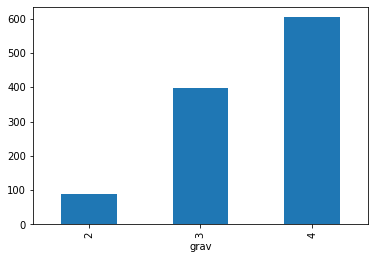

In [145]:
df1.groupby(['grav']).size().plot(kind="bar")

# Répartition par heure

<AxesSubplot:xlabel='hour'>

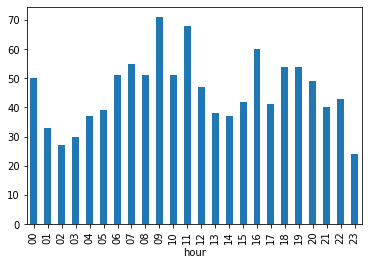

In [150]:

df1[['hour', 'min']] = df1['hrmn'].str.split(':', expand=True)
df1.groupby(['hour']).size().plot(kind="bar")

# Répartition sur l'année

<AxesSubplot:xlabel='day_of_year'>

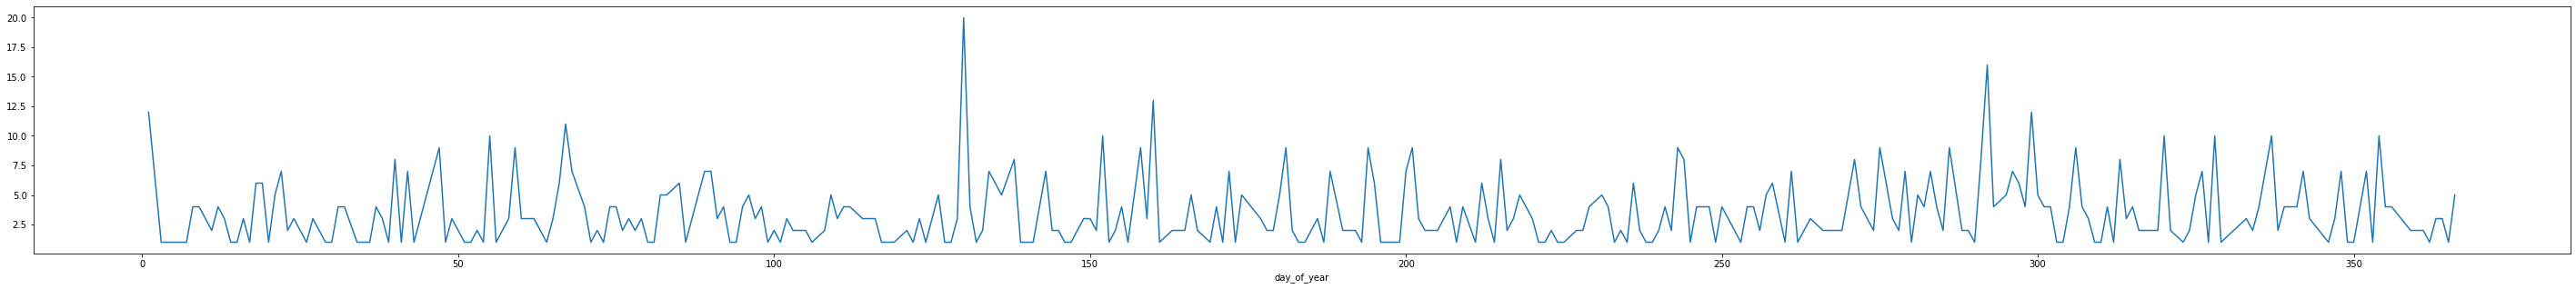

In [151]:
df1['day_of_year'] = pd.to_datetime(df1['jour'].astype(str) + "/" + df1['mois'].astype(str) + "/" + df1['an'].astype(str), format='%d/%m/%Y').dt.day_of_year
df1.groupby(['day_of_year']).size().plot(figsize=(50,5))

In [157]:
accident_loc = df1[['lat', 'long', 'grav']]
accident_loc = accident_loc.applymap(lambda x: x.strip().replace(',', '.') if isinstance(x, str) else x)
accident_loc["lat"] = pd.to_numeric(accident_loc["lat"], downcast="float")
accident_loc["long"] = pd.to_numeric(accident_loc["long"], downcast="float")
map = folium.Map(location=[accident_loc.lat.mean(), accident_loc.long.mean()], zoom_start=8, control_scale=True)
for index, location_info in accident_loc.iterrows():
    folium.Marker([location_info["lat"], location_info["long"]], popup=location_info["grav"]).add_to(map)
map